In [1]:
from WindPy import *
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [35]:
%pylab inline
#pylab.rcParams['figure.figsize'] = (16, 9)

Populating the interactive namespace from numpy and matplotlib


In [36]:
figsize(32, 18)

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!
You can use w.menu to help yourself to create commands(WSD,WSS,WST,WSI,WSQ,...)!

COPYRIGHT (C) 2016 WIND HONGHUI INFORMATION & TECHKNOLEWDGE CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
'''
dBbCodes = {1: '131810.SZ', 2: '131811.SZ', 3: '131800.SZ', 
            4: '131809.SZ', 7: '131801.SZ', 14: '131802.SZ', 
            28: '131803.SZ', 92: '131805.SZ', 182: '131806.SZ'}
#'''
#'''
dBbCodes = {'204001.SH': 1, '204002.SH': 2, '204003.SH': 3, 
            '204004.SH': 4, '204007.SH': 7, '204014.SH': 14, 
            '204028.SH': 28, '204091.SH': 91, '204182.SH': 182,
            '131810.SZ': 1, '131811.SZ': 2, '131800.SZ': 3, 
            '131809.SZ': 4, '131801.SZ': 7, '131802.SZ': 14, 
            '131803.SZ': 28, '131805.SZ': 91, '131806.SZ': 182}
#'''

In [18]:
sBgnDate = "2015-01-01"
sEndDate = "2017-05-21"    # in 2017-05-22 the day count convention has changed
sBgnDate = "2017-05-22"
sEndDate = "2017-06-30"

In [10]:
import ast
from collections import OrderedDict
odTrdCal = readTuplesToOrderedDict('TrdCalCn.txt')

In [11]:
# 生成指定日期范围内每种逆回购的真实有效天数

dEfcNd = {}    # effective natural days between Borrow Date and Buyback Date
dOccpd = {}    # natural days of money occupied (natural days between first and second settlement)
dEfcTd = {}    # effective trade days in between

stN = set(dBbCodes.values())

for n in stN:
    dEfcNd[n] = {}
    dOccpd[n] = {}
    dEfcTd[n] = {}
#end for

In [19]:
sBgnDt = sBgnDate.replace('-', '')
sEndDt = sEndDate.replace('-', '')
slDates = list(odTrdCal.keys())
# 找到最近交易日的位置
def findClosestTrdIdx(i):
    sResDate = slDates[i]
    while not odTrdCal[sResDate]['can_trd']:
        i += 1
        sResDate = slDates[i]
    #end while
    return i

iNtlBgn = slDates.index(sBgnDt)-1

while True:
    iNtlBgn += 1
    sDate = slDates[iNtlBgn]
    if sDate > sEndDt: break
    if not odTrdCal[sDate]['can_trd']:
        continue
    iClrBgn = iNtlBgn                   # Begin clearing date index (assume sDate is trade day)
    iSetBgn = findClosestTrdIdx(iClrBgn + 1)

    # 为每个 名义回购天数 计算 其 实际回购天数
    for n in set(dBbCodes.values()):
        iNtlEnd = iNtlBgn + n           # 到期自然日索引
        iClrEnd = findClosestTrdIdx(iNtlEnd)
        iSetEnd = findClosestTrdIdx(iClrEnd + 1)

        dEfcNd[n][sDate] = iClrEnd - iClrBgn
        dOccpd[n][sDate] = iSetEnd - iSetBgn

        nTrd = 0
        for i in range(iClrBgn, iClrEnd):
            if odTrdCal[slDates[i]]['can_trd']:
                nTrd += 1
        dEfcTd[n][sDate] = nTrd
    #end for

In [20]:
dEfcNd

{1: {'20170522': 1,
  '20170523': 1,
  '20170524': 1,
  '20170525': 1,
  '20170526': 5,
  '20170531': 1,
  '20170601': 1,
  '20170602': 3,
  '20170605': 1,
  '20170606': 1,
  '20170607': 1,
  '20170608': 1,
  '20170609': 3,
  '20170612': 1,
  '20170613': 1,
  '20170614': 1,
  '20170615': 1,
  '20170616': 3,
  '20170619': 1,
  '20170620': 1,
  '20170621': 1,
  '20170622': 1,
  '20170623': 3,
  '20170626': 1,
  '20170627': 1,
  '20170628': 1,
  '20170629': 1,
  '20170630': 3},
 2: {'20170522': 2,
  '20170523': 2,
  '20170524': 2,
  '20170525': 6,
  '20170526': 5,
  '20170531': 2,
  '20170601': 4,
  '20170602': 3,
  '20170605': 2,
  '20170606': 2,
  '20170607': 2,
  '20170608': 4,
  '20170609': 3,
  '20170612': 2,
  '20170613': 2,
  '20170614': 2,
  '20170615': 4,
  '20170616': 3,
  '20170619': 2,
  '20170620': 2,
  '20170621': 2,
  '20170622': 4,
  '20170623': 3,
  '20170626': 2,
  '20170627': 2,
  '20170628': 2,
  '20170629': 4,
  '20170630': 3},
 3: {'20170522': 3,
  '20170523': 3,
  '

In [27]:
# 下载指定时间段的日线数据
dPrc = {}
for n, sCode in dBbCodes.items():
    wRes = w.wsd(sCode, "vwap, volume", sBgnDate, sEndDate, "")
    dPrc[n] = wRes
#end for

In [28]:
dPrc

{'131800.SZ': .ErrorCode=0
 .Codes=[3]
 .Fields=[VWAP,VOLUME]
 .Times=[20170522,20170523,20170524,20170525,20170526,20170531,20170601,20170602,20170605,20170606,...]
 .Data=[[None,None,None,None,None,None,None,None,None,None,...],[None,None,None,None,None,None,None,None,None,None,...]],
 '131801.SZ': .ErrorCode=0
 .Codes=[7]
 .Fields=[VWAP,VOLUME]
 .Times=[20170522,20170523,20170524,20170525,20170526,20170531,20170601,20170602,20170605,20170606,...]
 .Data=[[None,None,None,None,None,None,None,None,None,None,...],[None,None,None,None,None,None,None,None,None,None,...]],
 '131802.SZ': .ErrorCode=0
 .Codes=[14]
 .Fields=[VWAP,VOLUME]
 .Times=[20170522,20170523,20170524,20170525,20170526,20170531,20170601,20170602,20170605,20170606,...]
 .Data=[[None,None,None,None,None,None,None,None,None,None,...],[None,None,None,None,None,None,None,None,None,None,...]],
 '131803.SZ': .ErrorCode=0
 .Codes=[28]
 .Fields=[VWAP,VOLUME]
 .Times=[20170522,20170523,20170524,20170525,20170526,20170531,20170601,

In [5]:

dtBgn = datetime.strptime(sBgnDate, "%Y-%m-%d")
dtEnd = datetime.strptime(sEndDate, "%Y-%m-%d")


In [6]:
# 获取A股交易日 (直到年末)
wRes = w.tdays(sBgnDate, sEndDate[:4] + "-12-31", "")

In [7]:
# 根据交易日生成 每一自然日的下一个交易日
lsTrdDates = [x.replace(microsecond = 0) for x in wRes.Times]
dNxtTrdDate = {}
for i in range(0, len(lsTrdDates)-1):
    dtCur = lsTrdDates[i]
    while dtCur + timedelta(days=1) <= lsTrdDates[i+1]:
        dNxtTrdDate[dtCur] = lsTrdDates[i+1]
        dtCur = dtCur + timedelta(days=1)
#end for


In [8]:
# 找到不早于指定日的最近交易日
def NearTrdDate(dtCur):
    if dtCur not in lsTrdDates:
        dtCur = dNxtTrdDate[dtCur]
    return dtCur

#NearTrdDate( datetime.datetime(2016, 3, 12) )

In [9]:
# 生成指定日期范围内每种逆回购的真实有效天数

dEfcTd = {}    # effective trade days in between
dEfcNd = {}    # effective natural days between Borrow Date and Buyback Date
dOccpd = {}    # natural days of money occupied (natural days between first and second settlement)

stN = set(dBbCodes.values())

for n in stN:
    dEfcTd[n] = {}
    dEfcNd[n] = {}
    dOccpd[n] = {}
#end for

iBgn = 0
while lsTrdDates[iBgn] < dtBgn:
    iBgn += 1

for n in stN:
    i = iBgn
    while lsTrdDates[i] <= dtEnd:
        dtBgn = lsTrdDates[i]
        dtSett1 = lsTrdDates[i+1]
        dtDue = dtBgn + timedelta(days = n)
        if dtDue >= lsTrdDates[-1]:
            nEfcTd = len(lsTrdDates) - i - 1 + (dtDue - lsTrdDates[-1]).days * 5 / 7
            dtSett2 = dtDue + timedelta(days = 1)
        else:
            dtDue = NearTrdDate(dtDue)
            nEfcTd = lsTrdDates.index(dtDue) - i
            dtSett2 = NearTrdDate( dtDue + timedelta(days = 1) )
        dEfcTd[n][dtBgn] = nEfcTd
        dEfcNd[n][dtBgn] = (dtDue - dtBgn).days
        dOccpd[n][dtBgn] = (dtSett2 - dtSett1).days
        i += 1
#end for


In [10]:
# 指定交易日的所有品种的真实有效天数
dCurEfc = {}
for n, d in dEfcNd.items():
    dCurEfc[n] = d[dtBgn]

dCurOcp = {}
for n, d in dOccpd.items():
    dCurOcp[n] = d[dtBgn]

In [11]:
dfNominal = pd.DataFrame(dBbCodes, index = ['nominal']).T

dfEffctv = pd.DataFrame(dCurEfc, index = ['effective']).T

dfOccpd = pd.DataFrame(dCurOcp, index = ['occupied']).T

dfDays = dfNominal.join(dfEffctv.join(dfOccpd), on='nominal')

In [16]:
dFee = {1:1, 2:2, 3:3, 4:4, 7:5, 14:10, 28:20, 91:30, 182:30}
dfFee = pd.DataFrame(dFee, index = ['fee']).T

In [18]:
dfDays = dfDays.join(dfFee, on='nominal')

In [19]:
dfDays

,nominal,effective,occupied,fee
131800.SZ,3,3,3,3
131801.SZ,7,7,7,5
131802.SZ,14,14,14,10
131803.SZ,28,28,28,20
131805.SZ,91,98,98,30
131806.SZ,182,182,182,30
131809.SZ,4,4,6,4
131810.SZ,1,1,1,1
131811.SZ,2,2,2,2
204001.SH,1,1,1,1


In [13]:
sBbCodes = ",".join(dBbCodes)

In [27]:
wRes = w.wsq(sBbCodes, "rt_bid1,rt_bsize1")

print(wRes.Times[0])
dfPrc = pd.DataFrame(wRes.Data, columns=wRes.Codes, index = wRes.Fields).T

dfPrc = dfPrc.join(dfDays)

dfPrc['effc_prc'] = dfPrc['RT_BID1'] * dfPrc['occupied'] / dfPrc['effective'] - dfPrc['fee']/dfPrc['effective']*0.365

dfPrc = dfPrc.sort_values(['effc_prc'], ascending=[False])

dfPrc[dfPrc['effective']<=7]

2017-07-03 13:32:15.005002


,RT_BID1,RT_BSIZE1,nominal,effective,occupied,fee,effc_prc
204004.SH,4.120,27200000.0,4,4,6,4,5.815000
131809.SZ,3.850,2000000.0,4,4,6,4,5.410000
131801.SZ,4.187,40495000.0,7,7,7,5,3.926286
204007.SH,4.185,43800000.0,7,7,7,5,3.924286
204002.SH,4.190,14000000.0,2,2,2,2,3.825000
204001.SH,4.190,281200000.0,1,1,1,1,3.825000
131810.SZ,4.120,145227000.0,1,1,1,1,3.755000
204003.SH,4.095,73100000.0,3,3,3,3,3.730000
131811.SZ,4.045,21787000.0,2,2,2,2,3.680000
131800.SZ,3.850,1384000.0,3,3,3,3,3.485000


In [26]:
# 下载指定时间段的日线数据
dPrc = {}
for n, sCode in dBbCodes.items():
    wRes = w.wsd(sCode, "vwap, volume", sBgnDate, sEndDate, "")
    dPrc[n] = wRes
#end for

In [135]:
lsColData = []
lsColName = []
for n in sorted(dBbCodes):
    lsColData.append(dPrc[n].Data[0])
    lsColName.append(n)
dfOrigPrc = pd.DataFrame(lsColData, columns=lsTrdDates[iBgn:iBgn+len(dEfcTd[1])], index = lsColName).T

In [136]:
dfOrigPrc

,1,2,3,4,7,14,28,92,182
2017-05-22,3.5722,3.5906,3.6828,3.7540,4.0763,3.8064,3.5667,3.6130,3.5289
2017-05-23,3.3857,3.4648,3.6728,3.7479,3.9911,3.9360,3.8052,3.5862,3.5904
2017-05-24,2.9638,3.3511,3.7462,3.5213,3.6372,3.7086,3.6864,3.6713,3.6378
2017-05-25,3.0658,3.2041,3.1696,3.2119,3.5752,3.5439,3.4293,3.6756,3.6846
2017-05-26,3.2449,2.9985,2.9189,2.9610,3.3176,3.4064,3.3485,3.4916,3.5407
2017-05-31,4.9477,3.7714,3.6617,3.5288,3.6800,3.5870,3.6405,3.4802,3.4833
2017-06-01,5.3358,4.8397,4.5211,4.5945,4.4703,4.1235,4.0584,3.6092,3.5229
2017-06-02,4.3731,4.1217,4.0808,4.0294,4.2607,4.1546,4.1249,3.7385,3.5545
2017-06-05,3.6961,3.9321,4.0323,4.0600,4.1576,4.1732,4.6128,3.7881,3.5478
2017-06-06,3.2423,3.4063,3.4230,3.5133,3.8017,3.8368,4.4281,3.5959,3.5926


In [141]:
# For before 20170522
#dfModiPrc = dfOrigPrc/365*lsColName/pd.DataFrame(dEfcTd)*244
#dfModiPrc = dfOrigPrc*lsColName/pd.DataFrame(dEfcNd)
#dfModiPrc = dfOrigPrc*lsColName/pd.DataFrame(dOccpd)

# For after 20170522
dfModiPrc = dfOrigPrc * pd.DataFrame(dOccpd) / pd.DataFrame(dEfcNd)

In [142]:
dfModiPrc

,1,2,3,4,7,14,28,92,182
2017-05-22,3.572200,3.590600,3.682800,7.50800,4.076300,3.806400,3.566700,3.613000,3.528900
2017-05-23,3.385700,3.464800,8.569867,3.74790,3.991100,3.936000,3.805200,3.586200,3.590400
2017-05-24,2.963800,10.053300,3.746200,3.52130,3.637200,3.708600,3.686400,3.671300,3.637800
2017-05-25,15.329000,3.204100,3.169600,3.21190,3.575200,3.543900,3.429300,3.755504,3.684600
2017-05-26,0.648980,0.599700,0.583780,0.59220,2.369714,2.919771,3.109321,3.343021,3.501791
2017-05-31,4.947700,7.542800,3.661700,3.52880,3.680000,3.587000,3.640500,3.480200,3.483300
2017-06-01,16.007400,4.839700,4.521100,4.59450,4.470300,4.123500,4.058400,3.687661,3.522900
2017-06-02,1.457700,1.373900,1.360267,2.01470,4.260700,4.154600,4.124900,3.658957,3.554500
2017-06-05,3.696100,3.932100,4.032300,6.09000,4.157600,4.173200,4.612800,3.788100,3.547800
2017-06-06,3.242300,3.406300,5.705000,3.51330,3.801700,3.836800,4.428100,3.595900,3.592600


In [143]:
dfMaxPrc = pd.DataFrame([dfModiPrc.idxmax(axis=1), dfModiPrc.max(axis=1)]).T

In [144]:
dfMaxPrc

,0,1
2017-05-22,4.0,7.508000
2017-05-23,3.0,8.569867
2017-05-24,2.0,10.053300
2017-05-25,1.0,15.329000
2017-05-26,182.0,3.501791
2017-05-31,2.0,7.542800
2017-06-01,1.0,16.007400
2017-06-02,7.0,4.260700
2017-06-05,4.0,6.090000
2017-06-06,3.0,5.705000


In [145]:
sr = dfMaxPrc[1]

In [146]:
sr.mean()

7.5592004144977833

In [21]:
ls2dBfHld = []
lsSctX = []
lsSctY = []
i = 0
while i < len(wres.Times) - 2:
    if wres.Times[i + 1] + timedelta(days=1) != wres.Times[i + 2]:
        ls2dBfHld.append(i)
        lsSctX.append(wres.Times[i])
        lsSctY.append(wres.Data[0][i])
        i += 2
    else:
        i += 1
#end while


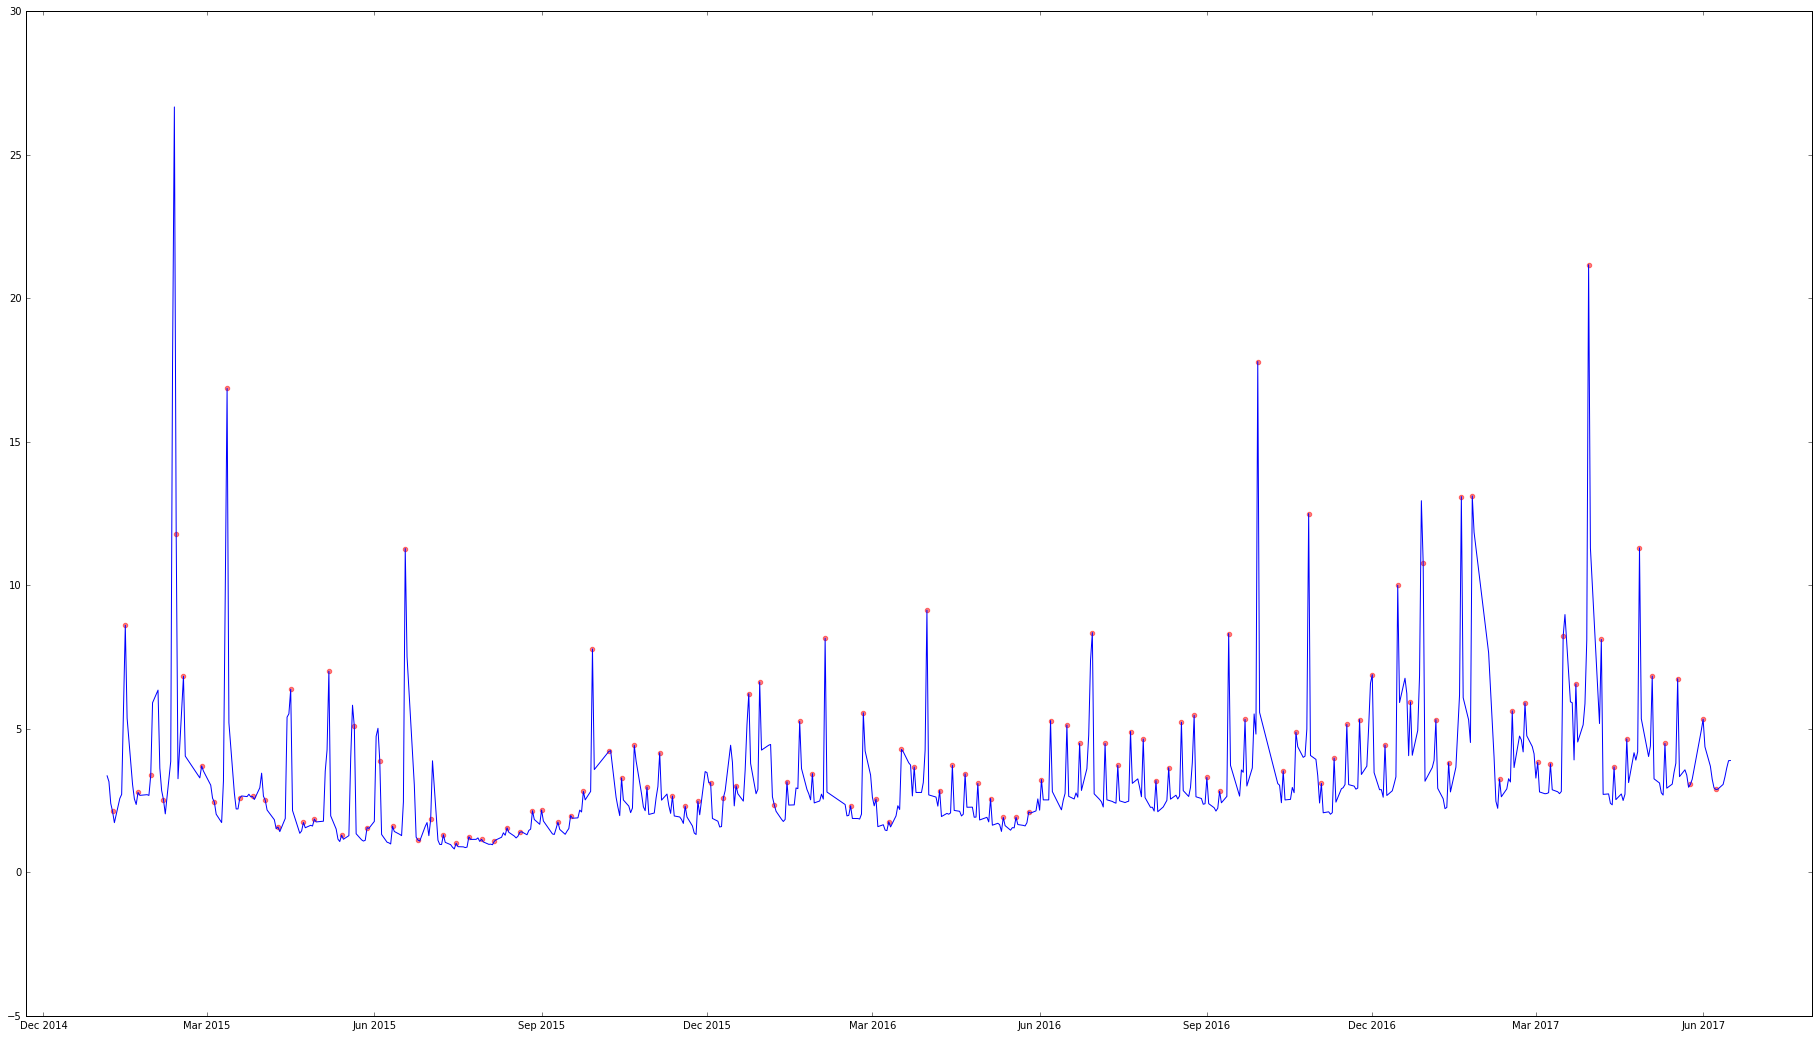

In [37]:
plt.plot(wres.Times, wres.Data[0])
#for i in ls2dBfHld:
#    plt.scatter(wres.Times[i], wres.Data[0][i])
plt.scatter(lsSctX, lsSctY, color = 'r', alpha = 0.5)
plt.show()

In [121]:
fl = open("\\\\jerry\\share\\Chen.TianYuan\\trd_dates.txt", 'w', encoding = 'utf-8')
for dt in lsTrdDates:
    fl.write(dt.strftime("%Y-%m-%d\n"))
fl.close()

In [7]:
# 把每行的 (XX, YY) 作为 key, value 对加入到 OrderedDict 中去
def readTuplesToOrderedDict(sFileName, sEncoding = 'utf-8'):
    ls = []
    with open(sFileName, 'r', encoding = sEncoding, errors = 'ignore') as fl:
        for s in fl.readlines():
            s = s.strip()
            if s == '': continue
            if s[0] == '#': continue    # Ignore comments
            t = ast.literal_eval(s)
            ls.append(t)
        #end for
    #end with
    return OrderedDict(ls)
#def


In [86]:
class BuyBack:
    # 回购代码列表
    dBbCodes = {'sh204001': 1, 'sh204002': 2, 'sh204003': 3, 
                'sh204004': 4, 'sh204007': 7, 'sh204014': 14, 
                'sh204028': 28, 'sh204091': 91, 'sh204182': 182,
                'sz131810': 1, 'sz131811': 2, 'sz131800': 3, 
                'sz131809': 4, 'sz131801': 7, 'sz131802': 14, 
                'sz131803': 28, 'sz131805': 91, 'sz131806': 182}
    
    # Nominal days: How much fee (RMB) every 100000 yuan
    dBbFees = {1: 1, 2: 2, 3: 3, 4: 4, 7: 5, 14: 10, 28: 20, 91: 30, 182: 30}
    
    dCurEfN = {}    # effective natural days between Borrow Date and Buyback Date (two clearing dates)
    dCurOcp = {}    # natural days of money occupied (natural days between first and second settlement)
    dCurEfT = {}    # effective trade days in between two clearing dates
    
    dBbTicker = {}
    dfBbTicker = None
    
    fMaxSzRateIn7d = 0.0
    sMaxSzCodeIn7d = ''
    fMaxShRateIn7d = 0.0
    sMaxShCodeIn7d = ''
    
    def __init__(self, odTrdCal, sDate):
        self.odTrdCal = odTrdCal      # 交易日历
        self.ticker = Ticker(self.dBbCodes.keys())
        self.calcEffectDays(sDate)
    
    # 生成指定日期范围内每种逆回购的真实有效天数.
    # 逆回购实行T+0日清算、T+1日交收制度。注意清算日一定是交易日，而交收日一定是清算日的下一个交易日。
    # 2017年5月22日之前，使用「回购天数」作为计息天数。所谓「回购天数」，是指，n天期回购的回购天数就是n。
    # 2017年5月22日之后，使用「实际占款天数」作为计息天数。所谓「实际占款天数」，是指两个交收日之间的自然日天数。
    def calcEffectDays(self, sDate):
        slDates = list(self.odTrdCal.keys())
        # 找到最近交易日的位置
        def findClosestTrdIdx(i):
            sResDate = slDates[i]
            while not self.odTrdCal[sResDate]['can_trd']:
                i += 1
                sResDate = slDates[i]
            #end while
            return i
        
        iNtlBgn = slDates.index(sDate)      # Begin natural date index
        iClrBgn = iNtlBgn                   # Begin clearing date index (assume sDate is trade day)
        iSetBgn = findClosestTrdIdx(iClrBgn + 1)
        
        # 为每个 名义回购天数 计算 其 实际回购天数
        for n in set(self.dBbCodes.values()):
            iNtlEnd = iNtlBgn + n           # 到期自然日索引
            iClrEnd = findClosestTrdIdx(iNtlEnd)
            iSetEnd = findClosestTrdIdx(iClrEnd + 1)
            
            self.dCurEfN[n] = iClrEnd - iClrBgn
            self.dCurOcp[n] = iSetEnd - iSetBgn
            
            nTrd = 0
            for i in range(iClrBgn, iClrEnd):
                if self.odTrdCal[slDates[i]]['can_trd']:
                    nTrd += 1
            self.dCurEfT[n] = nTrd
        #end for
        
        for sCode, nNmnl in self.dBbCodes.items():
            self.dBbTicker[sCode] = {'nominal':nNmnl, 'effective':self.dCurEfN[nNmnl], 
                                    'occupied':self.dCurOcp[nNmnl], 'effct_trade':self.dCurEfT[nNmnl]}
        
        #self.dfBbCodes = pd.DataFrame(self.dBbCodes).T
    #end def
    
    def printEffectRates(self):
        self.dfBbTicker = pd.DataFrame(self.dBbTicker).T
        self.dfBbTicker = self.dfBbTicker.sort_values(['effct_rate'], ascending=[False])
        print(self.dfBbTicker)
    
    def updateQuotes(self):
        self.ticker.refreshQuotes()
        self.fMaxSzRateIn7d = 0.0
        self.fMaxShRateIn7d = 0.0
        #self.sMaxSzCodeIn7d = ''
        for sCode, dQt in self.ticker.dTicker.items():
            dBbQuote = self.dBbTicker[sCode]
            dBbQuote['bid']    = dQt['bid']
            dBbQuote['bsize1'] = dQt['bsize1']
            nNmnl = dBbQuote['nominal']
            nEffN = dBbQuote['effective']   # effective natural days between two clearing dates
            fEffRate = dQt['bid'] * dBbQuote['occupied'] / nEffN - self.dBbFees[nNmnl] / nEffN * 0.365
            dBbQuote['effct_rate'] = fEffRate
            if nEffN <= 7:
                if sCode[:2] == 'sz' and fEffRate > self.fMaxSzRateIn7d:
                    self.fMaxSzRateIn7d = fEffRate
                    self.sMaxSzCodeIn7d = sCode
                if sCode[:2] == 'sh' and fEffRate > self.fMaxShRateIn7d:
                    self.fMaxShRateIn7d = fEffRate
                    self.sMaxShCodeIn7d = sCode
        return self.dBbTicker


In [37]:
# 把每行的 (XX, YY) 作为 key, value 对加入到 OrderedDict 中去
def readTuplesToOrderedDict(sFileName, sEncoding = 'utf-8'):
    ls = []
    with open(sFileName, 'r', encoding = sEncoding, errors = 'ignore') as fl:
        for s in fl.readlines():
            s = s.strip()
            if s == '': continue
            if s[0] == '#': continue    # Ignore comments
            t = ast.literal_eval(s)
            ls.append(t)
        #end for
    #end with
    return OrderedDict(ls)
#def


In [3]:
# 一个通用的实时行情获取类
# 行情数据源默认为新浪
# 代码采用新浪代码的表达方式

class Ticker:
    sEngine = 'sina'
    lsSymbols = []
    sSymbols = ''
    dTicker = {}   # defaultdict(dict)
    
    def __init__(self, lsSymbols = None):
        if lsSymbols:
            self.lsSymbols = list(lsSymbols)
            self.sSymbols = ','.join(self.lsSymbols)
    
    def genQuoteDict(self, lsColStr, lsColDef):
        nCols = min(len(lsColStr), len(lsColDef))
        dQuote = {}
        for i in range(0, nCols):
            sColName, sColType = lsColDef[i]
            sColStr = lsColStr[i]
            if sColType == 'float':
                try:
                    dQuote[sColName] = float(sColStr)
                except Exception:
                    dQuote[sColName] = None
            else:
                dQuote[sColName] = sColStr
        #end for
        return dQuote
    #end def
    
    def refreshQuotes(self):
        if self.sEngine == 'sina':
            self.refreshSinaQuotes()
    
    def refreshSinaQuotes(self):
        self.updateQuotesFromSina(self.sSymbols)
    
    def updateQuotes(self, symbols):
        if self.sEngine == 'sina':
            self.updateQuotesFromSina(symbols)
    
    def updateQuotesFromSina(self, symbols):
        # Use 'isinstance' to check if obj is an instance of str or any subclass of str.
        # Use 'type(obj) is str' to check if the type of obj is exactly str.
        if not isinstance(symbols, str):
            symbols = ','.join(symbols)
        sUrl = 'http://hq.sinajs.cn/list={}'.format(symbols)
        
        resp = requests.get(sUrl)
        lsLines = resp.text.split('\n')

        
        for sLine in lsLines:
            sLine = sLine.strip()
            if len(sLine) == 0:
                continue
            iBgn  = sLine.find('hq_str_') + 7
            iEnd  = sLine.find('=')
            sCode = sLine[iBgn:iEnd]
            
            iBgn  = sLine.find('"') + 1
            iEnd  = sLine.rfind('"')
            sInfo = sLine[iBgn:iEnd]
            lsCols = sInfo.split(',')
            #nCols = len(lsCols)

            #if lsCols[-1] == '':
            #    lsCols.pop()
            
            lsColDef = []
            if sCode[:2] in ['sh', 'sz']:    # A股
                # 0名称 1今开 2昨收(前复权) 3现价 4最高 5最低 6买一价 7卖一价 8成交数(股) 9成交额(元)
                # 10(买i申请股数、买i报价)i=1~5  20(卖i申请股数、卖i报价)i=1~5  30日期(yyyy-mm-dd)  31时间(HH:MM:SS)
                # 32状态： "00": "", "01": "临停1H", "02": "停牌", "03": "停牌", "04": "临停",
                #          "05": "停1/2", "07": "暂停", "-1": "无记录", "-2": "未上市", "-3": "退市"
                #lsColNames = ['name', 'open', 'prv_cls', 'now', 'high', 'low', 'bid', 'ask', 'qty', 'amt',
                #              'bsize1', 'bid1', 'bsize2', 'bid2', 'bsize3', 'bid3', 'bsize4', 'bid4', 'bsize5', 'bid5',
                #              'asize1', 'ask1', 'asize2', 'ask2', 'asize3', 'ask3', 'asize4', 'ask4', 'asize5', 'ask5',
                #              'date', 'time', 'status']
                lsColDef = [
                    ('name', 'str'), ('open', 'float'), ('prv_cls', 'float'), ('now', 'float'), ('high', 'float'), 
                    ('low', 'float'), ('bid', 'float'), ('ask', 'float'), ('qty', 'float'), ('amt', 'float'),
                    ('bsize1', 'float'), ('bid1', 'float'), ('bsize2', 'float'), ('bid2', 'float'), ('bsize3', 'float'), 
                    ('bid3', 'float'), ('bsize4', 'float'), ('bid4', 'float'), ('bsize5', 'float'), ('bid5', 'float'),
                    ('asize1', 'float'), ('ask1', 'float'), ('asize2', 'float'), ('ask2', 'float'), ('asize3', 'float'), 
                    ('ask3', 'float'), ('asize4', 'float'), ('ask4', 'float'), ('asize5', 'float'), ('ask5', 'float'),
                    ('date', 'str'), ('time', 'str'), ('status', 'str')
                ]
            elif sCode[:6] == 'CON_OP':    # 期权行情 (e.g. 'CON_OP_10000727')
                # 0.买量 1.买价 2.最新价 3.卖价 4.卖量 5.持仓量 6.涨跌幅(%) 7.行权价 8.昨收价 9.开盘价 10.涨停价 11.跌停价 
                # 12.申卖价五 13.申卖量五 14.申卖价四 15.申卖量四 16.申卖价三 17.申卖量三 18.申卖价二 19.申卖量二 20.申卖价一 21.申卖量一 
                # 22.申买价一 23.申买量一 24.申买价二 25.申买量二 26.申买价三 27.申买量三 28.申买价四 29.申买量四 30.申买价五 31.申买量五 
                # 32.行情时间(yyyy-mm-dd HH:MM:SS) 33.主力合约标识(是1, 否0) 34.状态码(E01, ...) 35.标的证券类型(EBS, ...) 
                # 36.标的股票 37.期权合约简称 38.振幅(%) 39.最高价 40.最低价 41.成交量 42.成交额 43.调整标志(M, A, B, ...)
                lsColDef = [
                    ('bsize', 'float'), ('bid', 'float'), ('now', 'float'), ('ask', 'float'), ('asize', 'float'), ('oi', 'float'), 
                    ('chgp', 'float'), ('strike', 'float'), ('prv_cls', 'float'), ('open', 'float'), ('up_lim', 'float'), ('lo_lim', 'float'),
                    ('ask5', 'float'), ('asize5', 'float'), ('ask4', 'float'), ('asize4', 'float'), ('ask3', 'float'), 
                    ('asize3', 'float'), ('ask2', 'float'), ('asize2', 'float'), ('ask1', 'float'), ('asize1', 'float'),
                    ('bid1', 'float'), ('bsize1', 'float'), ('bid2', 'float'), ('bsize2', 'float'), ('bid3', 'float'), 
                    ('bsize3', 'float'), ('bid4', 'float'), ('bsize4', 'float'), ('bid5', 'float'), ('bsize5', 'float'),
                    ('time', 'str'), ('is_main', 'str'), ('status', 'str'), ('ul_type', 'str'), ('ul_code', 'str'), ('name', 'str'), 
                    ('amp', 'float'), ('high', 'float'), ('low', 'float'), ('qty', 'float'), ('amt', 'float'), ('adj','str')
                ]
            elif sCode[:6] == 'CON_SO':    # 期权扩展行情 (e.g. 'CON_SO_10000727')
                # 0.期权合约简称 1.实值/虚值 2.内在价值 3.时间价值 4.成交量 5.Delta 6.Gamma 7.Theta 8.Vega 9.隐含波动率 
                # 10.最高价 11.最低价 12.交易代码 13.行权价 14.现价 15.理论价值 16.调整标志(M, A, B, ...)
                lsColDef = [
                    ('name', 'float'), ('in_the_money', 'str'), ('intrinsic_value', 'float'), ('time_value', 'float'), 
                    ('qty', 'float'), ('delta', 'float'), ('gamma', 'float'), ('theta', 'float'), ('vega', 'float'), 
                    ('implied_volatility', 'float'), ('high', 'float'), ('low', 'float'), ('trd_code', 'str'), 
                    ('strike', 'float'), ('now', 'float'), ('theory_value', 'float'), ('adj', 'str')
                ]
            #end if
            
            if lsColDef:
                self.dTicker[sCode] = self.genQuoteDict(lsCols, lsColDef)
            else:
                print('Column definition cannot be found for {}'.format(sLine))
        #end for



In [21]:
import time
import ast
import requests
import pandas as pd
from collections import OrderedDict

In [61]:
odTrdCal = readTuplesToOrderedDict('TrdCalCn.txt')

In [87]:
#bb = BuyBack(odTrdCal, time.strftime('%Y%m%d'))
bb = BuyBack(odTrdCal, '20170630')

In [88]:
dQt = bb.updateQuotes()

In [89]:
bb.fMaxSzRateIn7d

0.935

In [90]:
bb.printEffectRates()

            bid     bsize1  effct_rate  effct_trade  effective  nominal  \
sh204091  3.700     4000.0    3.864286         65.0       91.0     91.0   
sz131805  3.700    17790.0    3.864286         65.0       91.0     91.0   
sh204182  3.720     1000.0    3.680275        125.0      182.0    182.0   
sz131806  3.539     3120.0    3.498280        125.0      182.0    182.0   
sz131803  3.620    19400.0    3.359286         20.0       28.0     28.0   
sh204014  3.580   466000.0    3.319286         10.0       14.0     14.0   
sz131802  3.510    16140.0    3.249286         10.0       14.0     14.0   
sh204028  3.505    96000.0    3.244286         20.0       28.0     28.0   
sh204007  3.110   700000.0    2.849286          5.0        7.0      7.0   
sz131809  2.600  1771920.0    0.935000          2.0        4.0      4.0   
sh204004  2.210   143000.0    0.740000          2.0        4.0      4.0   
sh204001  2.170  7340000.0    0.601667          1.0        3.0      1.0   
sz131810  2.001   200000.

In [81]:
bb.dfBbTicker

,bid,bsize1,effct_rate,effct_trade,effective,nominal,occupied
sh204091,3.700,4000.0,3.984615,65.0,91.0,91.0,98.0
sh204182,3.720,1000.0,3.740440,125.0,182.0,182.0,183.0
sz131805,3.700,17790.0,3.626733,66.0,101.0,92.0,99.0
sz131803,3.620,19400.0,3.620000,20.0,28.0,28.0,28.0
sh204014,3.580,466000.0,3.580000,10.0,14.0,14.0,14.0
sz131806,3.539,3120.0,3.558445,125.0,182.0,182.0,183.0
sz131802,3.510,16140.0,3.510000,10.0,14.0,14.0,14.0
sh204028,3.505,96000.0,3.505000,20.0,28.0,28.0,28.0
sh204007,3.110,700000.0,3.110000,5.0,7.0,7.0,7.0
sz131809,2.600,1771920.0,1.300000,2.0,4.0,4.0,2.0


In [15]:
%timeit df = pd.DataFrame(dQt).T

1000 loops, best of 3: 1.58 ms per loop


In [56]:
%%timeit
df = pd.DataFrame(dQt).T

dfTot = df[['bid', 'bsize1']].join(bb.dfBbCodes)

dfTot['effct_rate'] = dfTot['bid'] * dfTot['occupied'] / dfTot['effective']

100 loops, best of 3: 3.24 ms per loop


In [57]:
%%timeit
for sCode, d in dQt.items():
    bb.dBbCodes[sCode]['effct_rate'] = d['bid'] * bb.dBbCodes[sCode]['occupied'] / bb.dBbCodes[sCode]['effective']


100000 loops, best of 3: 7.9 µs per loop


In [59]:
dfTot['effct_rate'].idxmax()

'sh204091'

In [48]:
dEffRate

{'sh204001': 0.7233333333333333,
 'sh204002': 0.7333333333333334,
 'sh204003': 0.6666666666666666,
 'sh204004': 1.105,
 'sh204007': 3.11,
 'sh204014': 3.5800000000000005,
 'sh204028': 3.505,
 'sh204091': 3.9846153846153847,
 'sh204182': 3.7404395604395604,
 'sz131800': 0.033999999999999996,
 'sz131801': 0.008,
 'sz131802': 3.5100000000000002,
 'sz131803': 3.62,
 'sz131805': 3.626732673267327,
 'sz131806': 3.5584450549450555,
 'sz131809': 1.3,
 'sz131810': 0.6669999999999999,
 'sz131811': 0.3336666666666666}

In [44]:
dfTot = dfTot.sort_values(['effct_rate'], ascending=[False])

In [45]:
dfTot

,bid,bsize1,effct_trade,effective,nominal,occupied,effct_rate
sh204091,3.7,4000,65,91,91,98,3.98462
sh204182,3.72,1000,125,182,182,183,3.74044
sz131805,3.7,17790,66,101,92,99,3.62673
sz131803,3.62,19400,20,28,28,28,3.62
sh204014,3.58,466000,10,14,14,14,3.58
sz131806,3.539,3120,125,182,182,183,3.55845
sz131802,3.51,16140,10,14,14,14,3.51
sh204028,3.505,96000,20,28,28,28,3.505
sh204007,3.11,700000,5,7,7,7,3.11
sz131809,2.6,1.77192e+06,2,4,4,2,1.3


In [29]:
# 使用通达信导出分钟线（最多100天）
from collections import defaultdict
from datetime import datetime, timedelta
import numpy as np

In [2]:
# 从通达信文件中读入分钟线
sTdxFldr = r'D:\Programs\new_tdx\T0002\export'
sCode = 'sz131810'

sTdxCode = '{}#{}'.format(sCode[:2].upper(), sCode[-6:])
sTdxPath = '{}/{}.txt'.format(sTdxFldr, sTdxCode)

In [3]:
with open(sTdxPath, 'r', encoding = 'gbk') as fl:
    lsLines = fl.readlines()

In [18]:
dtMornBgn = datetime.strptime('0930', '%H%M')
dtAftnBgn = datetime.strptime('1300', '%H%M')

In [55]:
lsDates = []
dDayMnt = defaultdict(list)
dDayPrc = defaultdict(list)

for sLine in lsLines[2:-1]:
    #日期	    时间	    开盘	    最高	    最低	    收盘	    成交量	    成交额
    lsCols = sLine.split('\t')
    sDate = lsCols[0]
    if sDate not in lsDates:
        lsDates.append(sDate)
    sTime = lsCols[1]
    if sTime < '1200':
        td = datetime.strptime(sTime, '%H%M') - dtMornBgn
        iTime = int(td.seconds / 60)
    else:
        td = datetime.strptime(sTime, '%H%M') - dtAftnBgn
        iTime = int(td.seconds / 60) + 120
    dDayMnt[sDate].append(iTime)
    fClose = float(lsCols[5])
    dDayPrc[sDate].append(fClose)
#end for



In [57]:
# 改造成 以0.5为中心，标准差为0.5 的序列
for sDate, lsPrc in dDayPrc.items():
    ar = np.array(dDayPrc[sDate])
    #ar = np.log(ar*100)
    fMean = np.mean(ar)
    fStd = np.std(ar)
    arNorm = (ar-fMean)/fStd*0.5 + 0.5
    dDayPrc[sDate] = arNorm

In [24]:
%matplotlib

Using matplotlib backend: TkAgg


In [25]:
import matplotlib.pyplot as plt

In [44]:
arX = np.arange(0, 30, 0.25)
plt.plot(arX, np.sqrt(arX))
plt.axis('equal')
plt.show()

In [58]:
for sDate in dDayPrc:
    plt.plot(dDayMnt[sDate], dDayPrc[sDate])
plt.show()

In [38]:
sDate

'2017-05-17'